# Exploration Data Analysis & Pre-Processing

## Preliminary Operations

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


## PubHealth Dataset


### Train Dataset

In [28]:
df_train = pd.read_csv(r'C:\Users\c.farallo\OneDrive - BE THINK, SOLVE, EXECUTE S.P.A\Desktop\Thesis\PUBHEALTH\train.tsv', sep='\t')
df_train

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
0,15661,"""The money the Clinton Foundation took from fr...","April 26, 2015","""Gingrich said the Clinton Foundation """"took m...",Katie Sanders,"""Hillary Clinton is in the political crosshair...",https://www.wsj.com/articles/clinton-foundatio...,false,"Foreign Policy, PunditFact, Newt Gingrich,"
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011",This article reports on the results of a study...,,While the financial costs of screening mammogr...,,mixture,"Screening,WebMD,women's health"
2,11358,SBRT Offers Prostate Cancer Patients High Canc...,"September 28, 2016",This news release describes five-year outcomes...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...",The news release quotes lead researcher Robert...,https://www.healthnewsreview.org/wp-content/up...,mixture,"Association/Society news release,Cancer"
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","November 8, 2011","While the story does many things well, the ove...",,"The story does discuss costs, but the framing ...",http://clinicaltrials.gov/ct2/results?term=can...,true,"Cancer,WebMD,women's health"
4,11276,Some appendicitis cases may not require ’emerg...,"September 20, 2010",We really don’t understand why only a handful ...,,"""Although the story didn’t cite the cost of ap...",,true,
...,...,...,...,...,...,...,...,...,...
9827,35948,The Sturgis motorcycle rally in 2020 resulted ...,"September 10, 2020","They want to know if mass-events (protests, co...",Dan Evon,"In September 2020, social media was abuzz over...",,unproven,"Politics Medical, COVID-19"
9828,401,AstraZeneca's infant respiratory drug prioriti...,"September 25, 1995",Britain’s AstraZeneca said a potential medicin...,,The “Breakthrough Therapy” and “Prime” designa...,,true,Health News
9829,2023,Testicular cancer deaths double with after 40 ...,"February 10, 2011",Men diagnosed with testicular cancer at 40 yea...,,This was true even when initial treatment and ...,http://bit.ly/fGNEw9,true,Health News
9830,38118,The FDA published “conclusive proof” that the...,"November 22, 2017",FDA Confirms DTaP Vaccine Causes Autism in Nov...,Rich Buhler & Staff,The FDA hasn’t confirmed a link between DTaP v...,https://www.truthorfiction.com/marshall-kamena...,false,Medical


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9832 entries, 0 to 9831
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   claim_id        9832 non-null   object
 1   claim           9824 non-null   object
 2   date_published  7895 non-null   object
 3   explanation     9824 non-null   object
 4   fact_checkers   9821 non-null   object
 5   main_text       9806 non-null   object
 6   sources         9804 non-null   object
 7   label           9805 non-null   object
 8   subjects        9804 non-null   object
dtypes: object(9)
memory usage: 691.4+ KB


In [30]:
print("Valori unici in 'label':")
print(df_train['label'].nunique())
print(df_train['label'].unique())
# Conta le righe con label 'true'
true_label_count = df_train[df_train['label'] == 'true'].shape[0]
print(f"Numero di righe con label 'true': {true_label_count}")


Valori unici in 'label':
5
['false' 'mixture' 'true' 'unproven' nan 'snopes']
Numero di righe con label 'true': 5078


In [14]:
print("Valori unici in 'subjects':")
print(df_train['subjects'].nunique())
print(df_train['subjects'].unique())

Valori unici in 'subjects':
5811
['Foreign Policy, PunditFact, Newt Gingrich, '
 "Screening,WebMD,women's health"
 'Association/Society news release,Cancer' ...
 'Public Health, Florida, Carlos Gimenez, ' 'breast cancer,red wine'
 'National, Economy, Chris Dodd, ']


In [18]:
# Prima, convertiamo la colonna 'subjects' in una serie di liste di subjects
subjects_series = df_train['subjects'].dropna().str.split(',')

# Ora, "esplodiamo" questa serie in modo che ogni elemento di ogni lista diventi una riga
exploded_subjects = subjects_series.explode()

# Calcoliamo la frequenza di ogni subject unico
subject_frequencies = exploded_subjects.value_counts()

# Stampiamo le frequenze
print(subject_frequencies)

subjects
                    2824
Health News         1242
 Health              985
 General News        931
Politics             428
                    ... 
 breaking bad          1
 Michael McCaul        1
chronic pain           1
medical cannabis       1
 Chris Dodd            1
Name: count, Length: 6082, dtype: int64


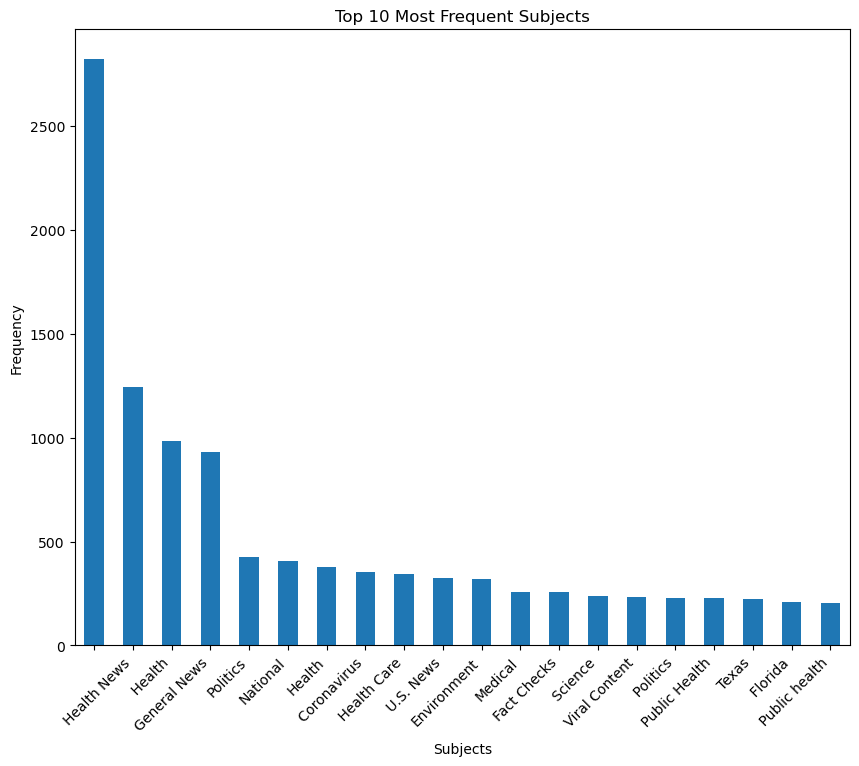

In [19]:
# Converti la colonna 'subjects' in una lista di soggetti, supponendo che siano separati da virgole
all_subjects = df_train['subjects'].dropna().apply(lambda x: x.split(',')).explode()

# Calcola la frequenza di ciascun soggetto
subject_counts = all_subjects.value_counts()

# Seleziona i primi 10 soggetti più frequenti
top_subjects = subject_counts.head(20)

# Creazione del diagramma a barre
plt.figure(figsize=(10, 8))
top_subjects.plot(kind='bar')
plt.title('Top 10 Most Frequent Subjects')
plt.xlabel('Subjects')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.show()


In [27]:
#Controllo dei subjects più frequenti perchè sembra vuota
top_n_subjects = subject_frequencies_filtered.head(1).index.tolist()

# Prepariamo una maschera per selezionare solo le righe che contengono almeno uno dei top subjects
# Modifica la funzione lambda per gestire valori NaN o non stringa
mask = df_train['subjects'].apply(lambda x: any(subject.strip() in x.split(',') for subject in top_n_subjects) if pd.notnull(x) and isinstance(x, str) else False)

# Usa la maschera per filtrare il DataFrame
top_subjects_rows = df_train[mask]
top_subjects_rows[['claim','label','subjects']]


,claim,label,subjects
35,Massachusetts to help test addiction treatment...,true,"Health, Massachusetts, Addiction treatment"
60,No more menthol cigarettes: New ban on tobacco...,true,"Health, Boston, General News, Charlie Baker, B..."
181,Governments to discuss tackling tuberculosis a...,true,"Health, United Nations, Tuberculosis"
213,Texas records 1st death linked to e-cigarette ...,true,"Health, General News, Lung disease, Vaping, Texas"
231,Delaware doc accused of trading drugs for sex ...,true,"Health, Drug addiction, Delaware, U.S. News, A..."
...,...,...,...
9632,State: 8 cases of severe lung disease from vap...,true,"Health, General News, Lung disease, New Mexico..."
9638,New chief of Global Fund says accountability i...,true,"Health, Malaria, Tuberculosis"
9650,Another case of meningococcal disease at Orego...,true,"Health, Oregon State University, Oregon, Menin..."
9714,Selena Gomez opens up on ‘life or death’ kidne...,true,"Health, Entertainment, Selena Gomez"


### Knowledge Base

In [33]:
# Crea un subset con solo le righe che hanno label 'true'
knowledge_base = df_train[df_train['label'] == 'true']
knowledge_base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5078 entries, 3 to 9829
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   claim_id        5078 non-null   object
 1   claim           5078 non-null   object
 2   date_published  3191 non-null   object
 3   explanation     5078 non-null   object
 4   fact_checkers   5078 non-null   object
 5   main_text       5078 non-null   object
 6   sources         5077 non-null   object
 7   label           5078 non-null   object
 8   subjects        5078 non-null   object
dtypes: object(9)
memory usage: 396.7+ KB


In [34]:
print("Valori unici in 'subjects':")
print(knowledge_base['subjects'].nunique())
print(knowledge_base['subjects'].unique())

Valori unici in 'subjects':
2834
["Cancer,WebMD,women's health" ' ' 'Health News' ...
 'New Hampshire, Anxiety, Health, Manchester, General News, Insects, AP Top News, Bees, Iraq, Veterans, U.S. News'
 'Ruth Bader Ginsburg, Supreme courts, Cancer, Pancreatic cancer, General News, Politics, U.S. Supreme Court, Radiation therapy, AP Top News, Courts, Health'
 'Public Health, Florida, Carlos Gimenez, ']


In [35]:
# Prima, convertiamo la colonna 'subjects' in una serie di liste di subjects
subjects_series = knowledge_base['subjects'].dropna().str.split(',')

# Ora, "esplodiamo" questa serie in modo che ogni elemento di ogni lista diventi una riga
exploded_subjects = subjects_series.explode()

# Calcoliamo la frequenza di ogni subject unico
subject_frequencies = exploded_subjects.value_counts()

# Stampiamo le frequenze
print(subject_frequencies)

subjects
Health News                         1242
 Health                              985
 General News                        931
                                     860
Health                               376
                                    ... 
 United Nations General Assembly       1
 Banjul                                1
 Medical technology                    1
 Venezuela                             1
 Carlos Gimenez                        1
Name: count, Length: 3327, dtype: int64


In [36]:
knowledge_base

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","November 8, 2011","While the story does many things well, the ove...",,"The story does discuss costs, but the framing ...",http://clinicaltrials.gov/ct2/results?term=can...,true,"Cancer,WebMD,women's health"
4,11276,Some appendicitis cases may not require ’emerg...,"September 20, 2010",We really don’t understand why only a handful ...,,"""Although the story didn’t cite the cost of ap...",,true,
5,8713,Britain to reveal trial criteria for coronavir...,"April 7, 2020",British regulators will this week reveal appro...,Alistair Smout,Antibody tests show whether whether people hav...,,true,Health News
6,9851,Angioplasty through the wrist backed by new study,"August 18, 2008",This is a good piece of reporting about a rece...,,The story did not provide cost estimates for e...,,true,
7,2768,U.S. says results encouraging for healthcare d...,"January 30, 2014",The Obama administration on Thursday reported ...,David Morgan,As part of President Barack Obama’s healthcare...,,true,Health News
...,...,...,...,...,...,...,...,...,...
9822,5551,Justice Ginsburg reports she’s on way to ‘well...,NaN,Supreme Court Justice Ruth Bader Ginsburg said...,Jessica Gresko,"Ginsburg, 86, made the comments at the Library...","/1f2b70cd9f1649778db9685585aeef06,https://www....",true,"Ruth Bader Ginsburg, Supreme courts, Cancer, P..."
9824,12958,"Miami-Dade is ""the first community in the worl...","January 24, 2017","""Gimenez said Miami-Dade is """"the first commun...",Amy Sherman,"""Miami-Dade Mayor Carlos Gimenez said that in ...",http://miamidade.granicus.com/MediaPlayer.php?...,true,"Public Health, Florida, Carlos Gimenez,"
9826,8197,Venezuela expands quarantine as number of coro...,"March 16, 2020",Venezuela will implement a nationwide quaranti...,"Angus Berwick, Luc Cohen, Mariela Nava",The country began a quarantine on Monday in a ...,,true,Health News
9828,401,AstraZeneca's infant respiratory drug prioriti...,"September 25, 1995",Britain’s AstraZeneca said a potential medicin...,,The “Breakthrough Therapy” and “Prime” designa...,,true,Health News


c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.

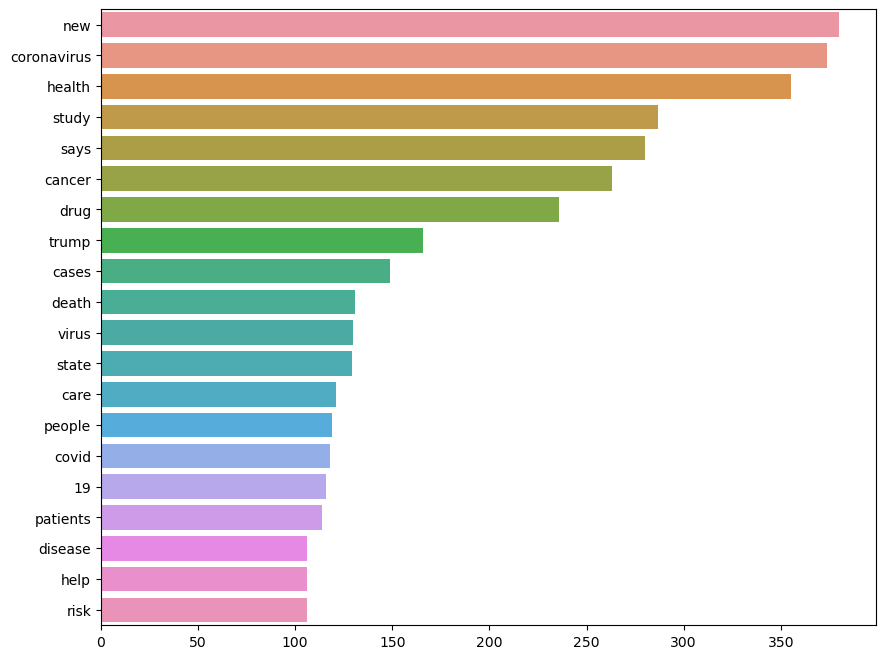

In [45]:
# Estrazione delle parole più frequenti senza filtrare per label
def plot_top_words(text_data, n=20):
    vec = CountVectorizer(stop_words='english').fit(text_data)
    bag_of_words = vec.transform(text_data)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
    words, freqs = zip(*words_freq)
    plt.figure(figsize=(10,8))
    sns.barplot(x=list(freqs), y=list(words))  # Utilizzo di x e y esplicitamente
    plt.show()

# Applica la funzione a tutte le 'Claim' nel dataset
all_claims = knowledge_base['claim']
plot_top_words(all_claims)

### Test Dataset


In [6]:
df_test = pd.read_csv(r'C:\Users\c.farallo\OneDrive - BE THINK, SOLVE, EXECUTE S.P.A\Desktop\Thesis\PUBHEALTH\test.tsv', sep='\t')
df_test.head()

,Unnamed: 0,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
0,0,33456,A mother revealed to her child in a letter aft...,"November 6, 2011",The one-eyed mother story expounds upon two mo...,David Mikkelson,"In April 2005, we spotted a tearjerker on the ...",,false,Glurge Gallery
1,1,2542,Study says too many Americans still drink too ...,"February 25, 2013","On any given day in the United States, 18 perc...",,That means the great majority of Americans sta...,http://bit.ly/X1NVtW,true,Health News
2,2,26678,Viral image Says 80% of novel coronavirus case...,"March 13, 2020",The website Information is Beautiful published...,Paul Specht,"Amid the spread of the novel coronavirus, many...",https://www.facebook.com/informationisbeautifu...,true,"Facebook Fact-checks, Coronavirus, Viral image,"
3,3,40705,An email says that 9-year old Craig Shergold o...,"March 16, 2015",Send greeting or business cards to cancer vict...,Rich Buhler & Staff,Craig Shergold is real and in 1989...,https://www.reddit.com/submit?url=https%3A%2F%...,false,"Inspirational, Pleas"
4,4,35718,"Employees at a Five Guys restaurant in Daphne,...","July 15, 2020","What's undetermined: As of this writing, Five ...",Dan MacGuill,"In July 2020, amid a new wave of nationwide pr...",,unproven,Law Enforcement


In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1235 non-null   int64 
 1   claim_id        1235 non-null   int64 
 2   claim           1235 non-null   object
 3   date_published  1009 non-null   object
 4   explanation     1235 non-null   object
 5   fact_checkers   1235 non-null   object
 6   main_text       1235 non-null   object
 7   sources         1235 non-null   object
 8   label           1233 non-null   object
 9   subjects        1233 non-null   object
dtypes: int64(2), object(8)
memory usage: 96.6+ KB


In [39]:
print("Valori unici in 'label':")
print(df_test['label'].nunique())
print(df_test['label'].unique())

Valori unici in 'label':
4
['false' 'true' 'unproven' 'mixture' nan]


In [41]:
print("Valori unici in 'subjects':")
print(df_test['subjects'].nunique())
print(df_test['subjects'].unique())

Valori unici in 'subjects':
840
['Glurge Gallery' 'Health News'
 'Facebook Fact-checks, Coronavirus, Viral image, ' 'Inspirational, Pleas'
 'Law Enforcement' 'Politics, deep state, fbi, iran'
 'San Diego, Health, General News, Flu, Latin America, Border patrols, U.S. News'
 'Politics, flyer, hate speech, KKK'
 'Fraud & Scams, health, Health Care, scams' 'Cancer,HealthDay'
 'Uncategorized, apple valley, bare naked islam, muslims'
 'Food, Food Contamination' 'Health, Access to health care, Maine'
 'Junk News, news punch, your news wire'
 'American Academy of Neurology,interferon beta-1b'
 'Politics, nathan phillips'
 'Health, Measles, General News, Pennsylvania, York'
 'Facebook Fact-checks, California, Coronavirus, Facebook posts, '
 'History, American History, irish slaves, irish slaves myth' 'Politics'
 'Health, Lung disease, General News, Houston'
 'heart disease,Reuters Health' ' ' 'Environment'
 'Environment, Natural Disasters, Weather, PunditFact, Dana Perino, '
 'Fact Checks, Vir

In [42]:
# Prima, convertiamo la colonna 'subjects' in una serie di liste di subjects
subjects_series = df_test['subjects'].dropna().str.split(',')

# Ora, "esplodiamo" questa serie in modo che ogni elemento di ogni lista diventi una riga
exploded_subjects = subjects_series.explode()

# Calcoliamo la frequenza di ogni subject unico
subject_frequencies = exploded_subjects.value_counts()

# Stampiamo le frequenze
print(subject_frequencies)

subjects
                   322
Health News        142
 Health            124
 General News       89
Politics            79
                  ... 
 bank                1
 peanut allergy      1
 immigrants          1
 AmeriPAC            1
 Medical ethics      1
Name: count, Length: 1552, dtype: int64


c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.

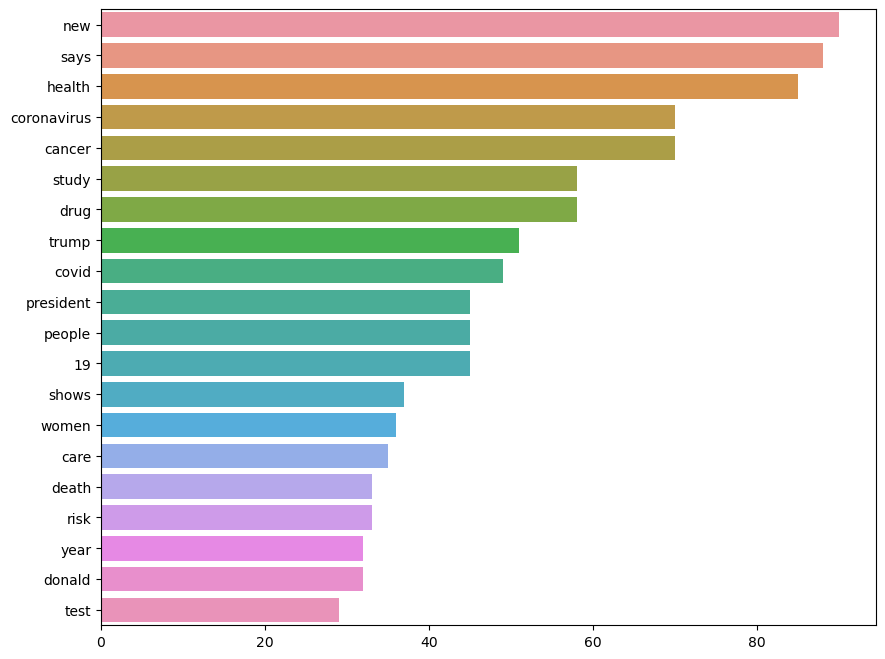

In [47]:
# Estrazione delle parole più frequenti senza filtrare per label
def plot_top_words(text_data, n=20):
    vec = CountVectorizer(stop_words='english').fit(text_data)
    bag_of_words = vec.transform(text_data)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
    words, freqs = zip(*words_freq)
    plt.figure(figsize=(10,8))
    sns.barplot(x=list(freqs), y=list(words))  # Utilizzo di x e y esplicitamente
    plt.show()

# Applica la funzione a tutte le 'Claim' nel dataset
all_claims = df_test['claim']
plot_top_words(all_claims)

In [ ]:
#knowledge_base.to_csv('knowledge_base')
#salviamo la kb

## Save Files

* Al momento non c'è nessun pre-processing e l'esplorazione è limitata; prendiamo solo i dataset che ci servono, con le colonne che ci servono

* Prendiamo solo le colonne che ci serviranno per il progetto

In [49]:
knowledge_base = knowledge_base[['claim','label','subjects']]
knowledge_base.head()

,claim,label,subjects
3,"Study: Vaccine for Breast, Ovarian Cancer Has ...",true,"Cancer,WebMD,women's health"
4,Some appendicitis cases may not require ’emerg...,true,
5,Britain to reveal trial criteria for coronavir...,true,Health News
6,Angioplasty through the wrist backed by new study,true,
7,U.S. says results encouraging for healthcare d...,true,Health News


In [50]:
#knowledge_base.to_csv('knowledge_base')


In [51]:
df_test = df_test[['claim','label','subjects']]
df_test.head()

,claim,label,subjects
0,A mother revealed to her child in a letter aft...,false,Glurge Gallery
1,Study says too many Americans still drink too ...,true,Health News
2,Viral image Says 80% of novel coronavirus case...,true,"Facebook Fact-checks, Coronavirus, Viral image,"
3,An email says that 9-year old Craig Shergold o...,false,"Inspirational, Pleas"
4,"Employees at a Five Guys restaurant in Daphne,...",unproven,Law Enforcement


In [52]:
#df_test.to_csv('df_test')